In [1]:
# -*- coding: utf-8
# Transparency International - Brazil (https://transparenciainternacional.org.br)
# Reinaldo Chaves (@paidatocandeira)
# Carrega a quantidade de votos nas Eleições 2014
#

In [ ]:
import pandas as pd
import numpy as np
import unidecode
from pathlib import Path

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Função para retirar acentuação 
def f(str):
    return (unidecode.unidecode(str))

In [4]:
# Funcao para ler arquivos em diretorio - bens 2014
def _reader_v_2014(fname):
    return pd.read_csv(fname, sep=';', header=None, encoding='latin_1', converters={9: lambda x: str(x),
                                                                                    12: lambda x: str(x),
                                                                                   })

Fonte: http://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais

# Carrega votos em 2014 - por municipio e zona

In [8]:
folder = Path("votos_2014")
votos_2014 = pd.concat([
    _reader_v_2014(txt)
    for txt in folder.glob("*.txt")
])

In [9]:
votos_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7902965 entries, 0 to 60343
Data columns (total 30 columns):
0     object
1     object
2     int64
3     int64
4     object
5     object
6     object
7     int64
8     object
9     object
10    int64
11    int64
12    object
13    object
14    object
15    object
16    int64
17    object
18    object
19    object
20    int64
21    object
22    int64
23    object
24    object
25    int64
26    object
27    object
28    int64
29    object
dtypes: int64(10), object(20)
memory usage: 1.8+ GB


In [10]:
del votos_2014[0]
del votos_2014[1]
del votos_2014[4]
del votos_2014[7]
del votos_2014[10]
del votos_2014[11]
del votos_2014[16]
del votos_2014[18]
del votos_2014[20]
del votos_2014[22]
del votos_2014[24]
del votos_2014[25]
del votos_2014[26]

In [11]:
votos_2014.columns  = ['ano', 'n_turno', 'uf', 'ue', 'municipio', 'n_zona', 'sequencial', 'nome', 'nome_urna', 'cargo', 'situacao', 'descricao_situacao', 'descricao_situacao_tot', 'partido', 'composicao_legenda', 'total_votos', 'transito']

In [12]:
votos_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7902965 entries, 0 to 60343
Data columns (total 17 columns):
ano                       int64
n_turno                   int64
uf                        object
ue                        object
municipio                 object
n_zona                    object
sequencial                object
nome                      object
nome_urna                 object
cargo                     object
situacao                  object
descricao_situacao        object
descricao_situacao_tot    object
partido                   object
composicao_legenda        object
total_votos               int64
transito                  object
dtypes: int64(3), object(14)
memory usage: 1.1+ GB


In [13]:
votos_2014.reset_index().head()

,index,ano,n_turno,uf,ue,municipio,n_zona,sequencial,nome,nome_urna,cargo,situacao,descricao_situacao,descricao_situacao_tot,partido,composicao_legenda,total_votos,transito
0,0,2014,1,BA,BA,LUÍS EDUARDO MAGALHÃES,205,50000000001,RENATA MALLET GUENA,RENATA MALLET,GOVERNADOR,APTO,DEFERIDO,NÃO ELEITO,PSTU,PSTU,44,N
1,1,2014,1,BA,BA,LUÍS EDUARDO MAGALHÃES,205,50000000007,MARCOS ANTONIO GUIMARÃES MENDES,MARCOS MENDES,GOVERNADOR,APTO,DEFERIDO,NÃO ELEITO,PSOL,PSOL,125,N
2,2,2014,1,BA,BA,LUÍS EDUARDO MAGALHÃES,205,50000000176,LIDICE DA MATA E SOUZA,LIDICE DA MATA,GOVERNADOR,APTO,DEFERIDO,NÃO ELEITO,PSB,PSB / PSL / PPL,1684,N
3,3,2014,1,BA,BA,LUÍS EDUARDO MAGALHÃES,205,50000000401,RUI COSTA DOS SANTOS,RUI COSTA,GOVERNADOR,APTO,DEFERIDO,ELEITO,PT,PT / PP / PSD / PDT / PR / PC do B / PTB / PMN,10368,N
4,4,2014,1,BA,BA,LUÍS EDUARDO MAGALHÃES,205,50000000620,PAULO GANEM SOUTO,PAULO SOUTO,GOVERNADOR,APTO,DEFERIDO,NÃO ELEITO,DEM,DEM / PSDB / PMDB / SD / PTN / PROS / PRB / PS...,12801,N


In [14]:
votos_2014.to_csv('resultados/votos_2014.csv', index=False)

In [4]:
votos_2014 = pd.read_csv("resultados/votos_2014.csv",sep=',',encoding = 'utf-8', converters={'sequencial': lambda x: str(x)})

In [5]:
votos_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7902965 entries, 0 to 7902964
Data columns (total 17 columns):
ano                       int64
n_turno                   int64
uf                        object
ue                        object
municipio                 object
n_zona                    int64
sequencial                object
nome                      object
nome_urna                 object
cargo                     object
situacao                  object
descricao_situacao        object
descricao_situacao_tot    object
partido                   object
composicao_legenda        object
total_votos               int64
transito                  object
dtypes: int64(4), object(13)
memory usage: 1.0+ GB


Opção de seleção apenas eleitos & senador e deputados

In [11]:
votos_eleitos_2014 = votos_2014[((votos_2014['descricao_situacao_tot'] == 'ELEITO POR QP') | 
                                (votos_2014['descricao_situacao_tot'] == 'ELEITO POR MÉDIA') | 
                                (votos_2014['descricao_situacao_tot'] == 'ELEITO')) &
                                ((votos_2014['cargo'] == 'SENADOR') |
                                 (votos_2014['cargo'] == 'DEPUTADO FEDERAL')) 
                               ]

In [12]:
votos_eleitos_2014.reset_index().head()

,index,ano,n_turno,uf,ue,municipio,n_zona,sequencial,nome,nome_urna,cargo,situacao,descricao_situacao,descricao_situacao_tot,partido,composicao_legenda,total_votos,transito
0,8,2014,1,BA,BA,LUÍS EDUARDO MAGALHÃES,205,50000000403,OTTO ROBERTO MENDONCA DE ALENCAR,OTTO ALENCAR,SENADOR,APTO,DEFERIDO,ELEITO,PSD,PT / PP / PSD / PDT / PR / PC do B / PTB / PMN,10231,N
1,45,2014,1,BA,BA,LUÍS EDUARDO MAGALHÃES,205,50000000120,ANTONIO LUIZ PARANHOS RIBEIRO LEITE DE BRITO,ANTONIO BRITO,DEPUTADO FEDERAL,APTO,DEFERIDO,ELEITO POR QP,PTB,PP / PDT / PT / PTB / PR / PSD / PC do B,17,N
2,46,2014,1,BA,BA,LUÍS EDUARDO MAGALHÃES,205,50000000121,BENITO DA GAMA SANTOS,BENITO GAMA,DEPUTADO FEDERAL,APTO,DEFERIDO,ELEITO POR MÉDIA,PTB,PP / PDT / PT / PTB / PR / PSD / PC do B,153,N
3,48,2014,1,BA,BA,LUÍS EDUARDO MAGALHÃES,205,50000000123,FELIX DE ALMEIDA MENDONÇA JUNIOR,FELIX JR,DEPUTADO FEDERAL,APTO,DEFERIDO,ELEITO POR QP,PDT,PP / PDT / PT / PTB / PR / PSD / PC do B,32,N
4,56,2014,1,BA,BA,LUÍS EDUARDO MAGALHÃES,205,50000000132,AFONSO BANDEIRA FLORENCE,AFONSO FLORENCE,DEPUTADO FEDERAL,APTO,DEFERIDO,ELEITO POR QP,PT,PP / PDT / PT / PTB / PR / PSD / PC do B,29,N


### Opção de seleção todas situações & senador e deputados

In [ ]:
parlamentares_votos = votos_2014[(votos_2014['cargo'] == 'SENADOR') | 
                                         (votos_2014['cargo'] == 'DEPUTADO FEDERAL')]

In [16]:
parlamentares_votos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2686987 entries, 6 to 60051
Data columns (total 17 columns):
ano                       int64
n_turno                   int64
uf                        object
ue                        object
municipio                 object
n_zona                    object
sequencial                object
nome                      object
nome_urna                 object
cargo                     object
situacao                  object
descricao_situacao        object
descricao_situacao_tot    object
partido                   object
composicao_legenda        object
total_votos               int64
transito                  object
dtypes: int64(3), object(14)
memory usage: 369.0+ MB


In [17]:
parlamentares_votos.to_csv('resultados/parlamentares_votos_2014.csv', index=False)

In [5]:
parlamentares_votos = pd.read_csv("resultados/parlamentares_votos_2014.csv",sep=',',encoding = 'utf-8', 
                                  converters={'sequencial': lambda x: str(x),
                                              'n_zona': lambda x: str(x)
                                             })

In [6]:
parlamentares_votos["municipio"] = parlamentares_votos["municipio"].apply(f)

In [7]:
parlamentares_votos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686987 entries, 0 to 2686986
Data columns (total 17 columns):
ano                       int64
n_turno                   int64
uf                        object
ue                        object
municipio                 object
n_zona                    object
sequencial                object
nome                      object
nome_urna                 object
cargo                     object
situacao                  object
descricao_situacao        object
descricao_situacao_tot    object
partido                   object
composicao_legenda        object
total_votos               int64
transito                  object
dtypes: int64(3), object(14)
memory usage: 348.5+ MB


Apenas eleitos e suplentes

In [7]:
parlamentares_selecao = parlamentares_votos[(parlamentares_votos['descricao_situacao_tot'] == 'ELEITO POR QP') | 
                                (parlamentares_votos['descricao_situacao_tot'] == 'ELEITO POR MÉDIA') | 
                                (parlamentares_votos['descricao_situacao_tot'] == 'ELEITO') |
                                (parlamentares_votos['descricao_situacao_tot'] == 'SUPLENTE') 
                               ]

In [8]:
parlamentares_selecao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017944 entries, 2 to 2686986
Data columns (total 17 columns):
ano                       int64
n_turno                   int64
uf                        object
ue                        object
municipio                 object
n_zona                    object
sequencial                object
nome                      object
nome_urna                 object
cargo                     object
situacao                  object
descricao_situacao        object
descricao_situacao_tot    object
partido                   object
composicao_legenda        object
total_votos               int64
transito                  object
dtypes: int64(3), object(14)
memory usage: 277.1+ MB


In [10]:
parlamentares_selecao.to_csv('resultados/parlamentares_votos_2014_eleitos_suplentes.csv', index=False)

In [6]:
parlamentares_selecao2 = parlamentares_votos[(parlamentares_votos['descricao_situacao_tot'] == 'ELEITO POR QP') | 
                                (parlamentares_votos['descricao_situacao_tot'] == 'ELEITO POR MÉDIA') | 
                                (parlamentares_votos['descricao_situacao_tot'] == 'ELEITO') 
                               ]

In [7]:
parlamentares_selecao2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208671 entries, 2 to 2686985
Data columns (total 17 columns):
ano                       208671 non-null int64
n_turno                   208671 non-null int64
uf                        208671 non-null object
ue                        208671 non-null object
municipio                 208671 non-null object
n_zona                    208671 non-null object
sequencial                208671 non-null object
nome                      208671 non-null object
nome_urna                 208671 non-null object
cargo                     208671 non-null object
situacao                  208671 non-null object
descricao_situacao        208671 non-null object
descricao_situacao_tot    208671 non-null object
partido                   208671 non-null object
composicao_legenda        208671 non-null object
total_votos               208671 non-null int64
transito                  208671 non-null object
dtypes: int64(3), object(14)
memory usage: 28.7+ MB


In [9]:
parlamentares_selecao2.to_csv('resultados/parlamentares_votos_2014_eleitos.csv', index=False)

Seleciona um candidato

In [8]:
beto = parlamentares_votos[(parlamentares_votos['nome_urna'] == 'BETO MANSUR')]

In [9]:
beto.total_votos.sum()

31301

In [10]:
beto.groupby("municipio").total_votos.sum().reset_index().sort_values("total_votos", ascending=False).head(10)

,municipio,total_votos
544,SANTOS,10685
461,PRAIA GRANDE,3740
571,SAO VICENTE,2669
213,GUARUJA,2579
564,SAO PAULO,1442
86,BRAGANCA PAULISTA,1355
150,CUBATAO,974
254,ITANHAEM,434
108,CAMPINAS,400
425,PERUIBE,357


In [11]:
beto.groupby("n_zona").total_votos.sum().reset_index().sort_values("total_votos", ascending=False).head(10)

,n_zona,total_votos
193,273,4108
192,272,3736
21,118,3138
242,317,2207
268,340,1573
341,406,1533
235,310,1363
189,27,1355
126,212,1216
86,177,1096


In [12]:
pd.pivot_table(beto,index=["municipio","n_zona"], values=["total_votos"], aggfunc=np.sum).sort_values(by="total_votos", ascending=False)

total_votos
municipio         n_zona             
SANTOS            273            4108
                  272            3439
                  118            3138
PRAIA GRANDE      317            2207
SAO VICENTE       340            1573
PRAIA GRANDE      406            1533
GUARUJA           310            1363
BRAGANCA PAULISTA 27             1355
GUARUJA           212            1216
SAO VICENTE       177            1096
CUBATAO           119             974
ITANHAEM          189             434
PERUIBE           295             357
MONGAGUA          189             336
BERTIOGA          272             297
PARIQUERA-ACU     228             292
BARRA BONITA      200             254
CAMPINAS          378             207
CANDIDO MOTA      226             195
BOITUVA           369             188
PACAEMBU          154             172
SUMARE            230             148
REGISTRO          172             141
AGUAS DE LINDOIA  134             140
CANANEIA          36              132
LENCOIS PAULISTA  161             129
ITARIRI           295             124
SETE BARRAS       172             117
ASSIS             15              115
SOCORRO           136             115
...                               ...
RIBEIRAO BONITO   107               0
RIBEIRA           10                0
RESTINGA          240               0
LINS              297               0
REDENCAO DA SERRA 314               0
RANCHARIA         106               0
QUINTANA          99                0
QUELUZ            105               0
JOANOPOLIS        92                0
JERIQUARA         155               0
JARDINOPOLIS      204               0
RINCAO            239               0
ITUVERAVA         60                0
SALTINHO          270               0
SALMOURAO         163               0
SALESOPOLIS       112               0
SALES OLIVEIRA    235               0
SALES             207               0
SAGRES            163               0
SABINO            297               0
RUBINEIA          187               0
RUBIACEA          151               0
ROSEIRA           190               0
ROSANA            330               0
JABORANDI         178               0
JACI              72                0
RIO DAS PEDRAS    244               0
JALES             152               0
JAMBEIRO          29                0
MONTEIRO LOBATO   282               0

[792 rows x 1 columns]

Dois candidatos

In [55]:
deputados = parlamentares_votos[(parlamentares_votos['nome_urna'] == 'JOÃO RODRIGUES') |
                                  (parlamentares_votos['nome'] == 'CELSO ALENCAR RAMOS JACOB')]
deputados.info()
deputados.total_votos.sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 211305 to 1526933
Data columns (total 17 columns):
ano                       578 non-null int64
n_turno                   578 non-null int64
uf                        578 non-null object
ue                        578 non-null object
municipio                 578 non-null object
n_zona                    578 non-null int64
sequencial                578 non-null object
nome                      578 non-null object
nome_urna                 578 non-null object
cargo                     578 non-null object
situacao                  578 non-null object
descricao_situacao        578 non-null object
descricao_situacao_tot    578 non-null object
partido                   578 non-null object
composicao_legenda        578 non-null object
total_votos               578 non-null int64
transito                  578 non-null object
dtypes: int64(4), object(13)
memory usage: 81.3+ KB


258023

In [56]:
#deputados = pd.concat([j_rodrigues, c_jacob])

In [57]:
deputados.reset_index().head()

,index,ano,n_turno,uf,ue,municipio,n_zona,sequencial,nome,nome_urna,cargo,situacao,descricao_situacao,descricao_situacao_tot,partido,composicao_legenda,total_votos,transito
0,211305,2014,1,RJ,RJ,QUISSAMÃ,255,190000001433,CELSO ALENCAR RAMOS JACOB,CELSO JACOB,DEPUTADO FEDERAL,APTO,DEFERIDO,SUPLENTE,PMDB,PMDB / PP / PSC / PSD / PTB,0,N
1,212266,2014,1,RJ,RJ,ANGRA DOS REIS,116,190000001433,CELSO ALENCAR RAMOS JACOB,CELSO JACOB,DEPUTADO FEDERAL,APTO,DEFERIDO,SUPLENTE,PMDB,PMDB / PP / PSC / PSD / PTB,6,N
2,213227,2014,1,RJ,RJ,ANGRA DOS REIS,147,190000001433,CELSO ALENCAR RAMOS JACOB,CELSO JACOB,DEPUTADO FEDERAL,APTO,DEFERIDO,SUPLENTE,PMDB,PMDB / PP / PSC / PSD / PTB,16,N
3,214188,2014,1,RJ,RJ,QUATIS,183,190000001433,CELSO ALENCAR RAMOS JACOB,CELSO JACOB,DEPUTADO FEDERAL,APTO,DEFERIDO,SUPLENTE,PMDB,PMDB / PP / PSC / PSD / PTB,4,N
4,215149,2014,1,RJ,RJ,ARARUAMA,92,190000001433,CELSO ALENCAR RAMOS JACOB,CELSO JACOB,DEPUTADO FEDERAL,APTO,DEFERIDO,SUPLENTE,PMDB,PMDB / PP / PSC / PSD / PTB,8,N


In [58]:
deputados.total_votos.sum()

258023

In [41]:
deputados.to_excel('resultados/votosdeputadosselecionados.xlsx',sheet_name='Sheet1')

Gráficos

In [73]:
beto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 1599226 to 2649674
Data columns (total 17 columns):
ano                       792 non-null int64
n_turno                   792 non-null int64
uf                        792 non-null object
ue                        792 non-null object
municipio                 792 non-null object
n_zona                    792 non-null int64
sequencial                792 non-null object
nome                      792 non-null object
nome_urna                 792 non-null object
cargo                     792 non-null object
situacao                  792 non-null object
descricao_situacao        792 non-null object
descricao_situacao_tot    792 non-null object
partido                   792 non-null object
composicao_legenda        792 non-null object
total_votos               792 non-null int64
transito                  792 non-null object
dtypes: int64(4), object(13)
memory usage: 111.4+ KB


In [23]:
grafico = beto.groupby("municipio").total_votos.sum().reset_index().sort_values("total_votos", ascending=False).head(10)

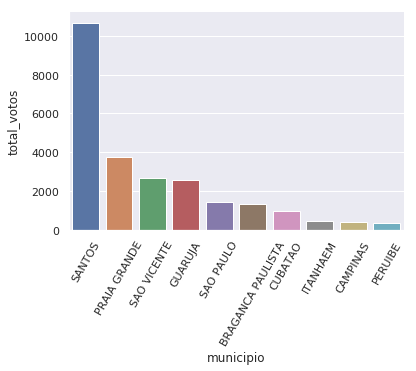

In [27]:
sns.set()
ax = sns.barplot(x="municipio", y="total_votos", data=grafico)
for item in ax.get_xticklabels():
    item.set_rotation(60)
sns.despine()

Cruza com zonas eleitorais

In [11]:
zonas = pd.read_csv("resultados/zonaseleitorais.csv",sep=',',encoding = 'utf-8', 
                                  converters={'n_zona': lambda x: str(x), 'cep': lambda x: str(x)})

In [12]:
zonas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 7 columns):
n_zona            2697 non-null object
cod_processual    2697 non-null object
endereco          2697 non-null object
cep               2697 non-null object
bairro            2697 non-null object
municipio_sede    2697 non-null object
uf                2697 non-null object
dtypes: object(7)
memory usage: 147.6+ KB


In [13]:
zonas["municipio_sede"] = zonas["municipio_sede"].apply(f)

In [14]:
zonas_santos = zonas[(zonas['uf'] == 'SP') & 
                     (zonas['municipio_sede'] == 'SANTOS')
                    ]

In [15]:
zonas_santos

,n_zona,cod_processual,endereco,cep,bairro,municipio_sede,uf
2084,118,26-0118,"RUA AMADOR BUENO, 63",11030151,CENTRO,SANTOS,SP
2238,272,26-0272,"RUA VEREADOR HENRIQUE SOLER, 279",11030111,PONTA DA PRAIA,SANTOS,SP
2239,273,26-0273,"AV. BERNARDINO DE CAMPOS, 99",11075355,VILA BELMIRO,SANTOS,SP


In [16]:
beto_santos = beto[(beto['municipio'] == 'SANTOS')]

In [17]:
beto_santos.total_votos.sum()

10685

In [18]:
beto_santos_secoes = pd.merge(beto_santos, zonas_santos, left_on='n_zona', right_on='n_zona')

In [19]:
beto_santos_secoes.reset_index().head()

,index,ano,n_turno,uf_x,ue,municipio,n_zona,sequencial,nome,nome_urna,...,partido,composicao_legenda,total_votos,transito,cod_processual,endereco,cep,bairro,municipio_sede,uf_y
0,0,2014,1,SP,SP,SANTOS,118,250000001270,PAULO ROBERTO GOMES MANSUR,BETO MANSUR,...,PRB,PRB,3138,N,26-0118,"RUA AMADOR BUENO, 63",11030151,CENTRO,SANTOS,SP
1,1,2014,1,SP,SP,SANTOS,272,250000001270,PAULO ROBERTO GOMES MANSUR,BETO MANSUR,...,PRB,PRB,3439,N,26-0272,"RUA VEREADOR HENRIQUE SOLER, 279",11030111,PONTA DA PRAIA,SANTOS,SP
2,2,2014,1,SP,SP,SANTOS,273,250000001270,PAULO ROBERTO GOMES MANSUR,BETO MANSUR,...,PRB,PRB,4108,N,26-0273,"AV. BERNARDINO DE CAMPOS, 99",11075355,VILA BELMIRO,SANTOS,SP


In [29]:
beto_santos_secoes.groupby("bairro").total_votos.sum().reset_index().sort_values("total_votos", ascending=False).head(10)

,bairro,total_votos
2,VILA BELMIRO,4108
1,PONTA DA PRAIA,3439
0,CENTRO,3138


In [30]:
grafico = beto_santos_secoes.groupby("bairro").total_votos.sum().reset_index().sort_values("total_votos", ascending=False).head(10)

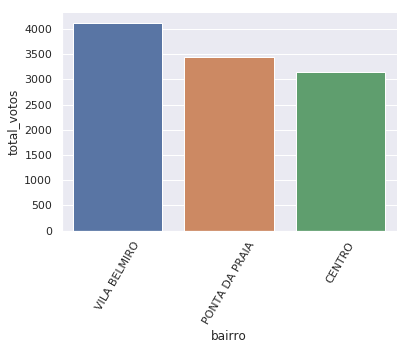

In [31]:
sns.set()
ax = sns.barplot(x="bairro", y="total_votos", data=grafico)
for item in ax.get_xticklabels():
    item.set_rotation(60)
sns.despine()

In [37]:
beto_bar

,municipio,total_votos,total_geral
544,SANTOS,10685,31301
461,PRAIA GRANDE,3740,31301
571,SAO VICENTE,2669,31301
213,GUARUJA,2579,31301
564,SAO PAULO,1442,31301
86,BRAGANCA PAULISTA,1355,31301
150,CUBATAO,974,31301
254,ITANHAEM,434,31301
108,CAMPINAS,400,31301
425,PERUIBE,357,31301


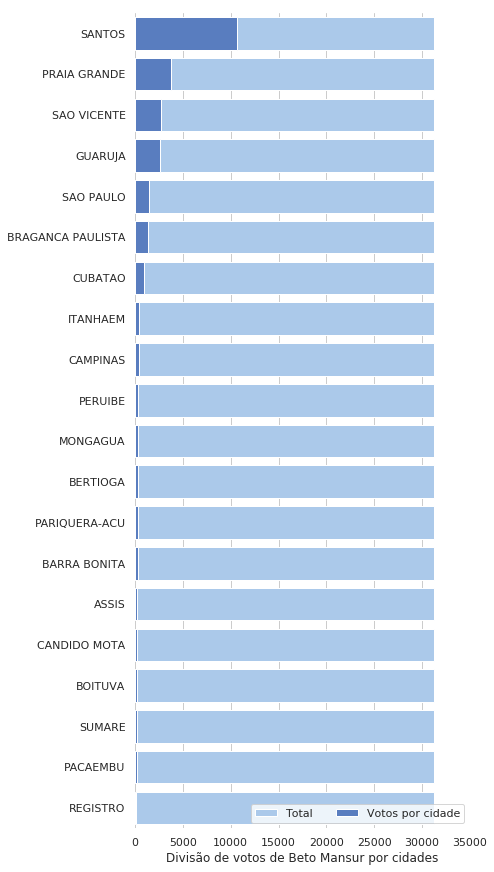

In [45]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
beto_bar = beto.groupby("municipio").total_votos.sum().reset_index().sort_values("total_votos", ascending=False).head(20)
beto_bar['total_geral'] = beto.total_votos.sum()

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total_geral", y="municipio", data=beto_bar,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="total_votos", y="municipio", data=beto_bar,
            label="Votos por cidade", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35000), ylabel="",
       xlabel="Divisão de votos de Beto Mansur por cidades")
sns.despine(left=True, bottom=True)
